In [1]:
import pandas as pd
from glob import glob

shuffled_peak_with_sequence_filepaths = glob('/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/9.4_shuffled_union_peaks/*/*with_sequence.bed')


In [9]:
rbfox2_to_plot_together_label = ['unioned_cleaned_peaks']


In [3]:
rbfox2_shuffles = [f for f in shuffled_peak_with_sequence_filepaths if f.split('/')[-1].split('_shuffle')[0] in rbfox2_to_plot_together_label]
len(rbfox2_shuffles)

100

# Load eCLIPs

In [28]:
import pybedtools

def load_eclip(filepath, l2fc_threshold=2, l10p_threshold=3):
    print(filepath)
    eclip_df = pd.read_csv(filepath,
                               sep='\t'
                               )

    total_columns = len(eclip_df.columns)
    
    eclip_df.columns=['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand'] + [i for i in range(total_columns - 6)]
    print('\tBefore filter:', len(eclip_df))

    if 'region' in eclip_df.columns:
        eclip_df = eclip_df[~eclip_df.region.isin([
            'distintron500', 'proxintron500', 'distnoncoding_intron500', 'proxnoncoding_intron500', 'intergenic'
        ])]
        
    eclip_df = eclip_df[(eclip_df.l2fc > l2fc_threshold) & (eclip_df.l10p > l10p_threshold)]
    
    eclip_df['chrom'] = [i.split('chr')[1] for i in eclip_df.chrom]
    print('\tAfter filter: ', len(eclip_df))
    eclip_bed = pybedtools.BedTool.from_dataframe(eclip_df)

    return eclip_bed


overall_path = '/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/reference/hg38_eCLIPs'

rbfox2_native_path = '{}/RBFOX2_native_eclip.bed.annotated'.format(overall_path)
rbfox2_cterm_path = '{}/RBFOX2_CTerminus_1.bed.annotated'.format(overall_path)

eclips = {
    'rbfox2_native': load_eclip(rbfox2_native_path),
    'rbfox2_cterm': load_eclip(rbfox2_cterm_path),
    'rbfox2_cterm_l2fc_2': load_eclip(rbfox2_cterm_path, l2fc_threshold=2),
    'rbfox2_cterm_l2fc_4': load_eclip(rbfox2_cterm_path, l2fc_threshold=4),
    'rbfox2_cterm_l2fc_6': load_eclip(rbfox2_cterm_path, l2fc_threshold=6),
    'rbfox2_cterm_l2fc_8': load_eclip(rbfox2_cterm_path, l2fc_threshold=8),
    'rbfox2_cterm_l2fc_10': load_eclip(rbfox2_cterm_path, l2fc_threshold=10)
}

/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/reference/hg38_eCLIPs/RBFOX2_native_eclip.bed.annotated
	Before filter: 74853
	After filter:  8750
/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/reference/hg38_eCLIPs/RBFOX2_CTerminus_1.bed.annotated
	Before filter: 263128
	After filter:  16870
/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/reference/hg38_eCLIPs/RBFOX2_CTerminus_1.bed.annotated
	Before filter: 263128
	After filter:  16870
/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/reference/hg38_eCLIPs/RBFOX2_CTerminus_1.bed.annotated
	Before filter: 263128
	After filter:  12785
/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/reference/hg38_eCLIPs/RBFOX2_CTerminus_1.bed.annotated
	Before filter: 263128
	After filter:  9864
/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/reference/hg38_eCLIPs/RBFOX2_CTerminus_1.bed.annotated
	Before filter: 263128
	After filter:  7584
/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/reference/hg38_eCL

# Calculate actual overlaps 

In [29]:
actual_rbfox2 = [f for f in glob('9.4_unioned_peaks/*') if f.split('/')[-1].split('.bed')[0] in rbfox2_to_plot_together_label]
actual_rbfox2

['9.4_unioned_peaks/unioned_cleaned_peaks.bed']

In [30]:
def calculate_bed_intersection_fraction(stamp_bed, eclip_bed):
    intersection = stamp_bed.intersect(eclip_bed, s=True, u=True)
    fraction_overlapped_by_eclip = len(intersection)/len(stamp_bed)
    return fraction_overlapped_by_eclip

def calculate_fraction_of_eclip_overlapped(stamp_bed, eclip_bed):
    intersection = stamp_bed.intersect(eclip_bed, s=True, u=True)
    fraction_overlapped_by_stamp = len(intersection)/len(eclip_bed)
    return fraction_overlapped_by_stamp

In [38]:
eclips

{'rbfox2_native': <BedTool(/scratch/ekofman/31426606.tscc-mgr7.local/pybedtools.yi3q13na.tmp)>,
 'rbfox2_cterm': <BedTool(/scratch/ekofman/31426606.tscc-mgr7.local/pybedtools.cc6e5kll.tmp)>,
 'rbfox2_cterm_l2fc_2': <BedTool(/scratch/ekofman/31426606.tscc-mgr7.local/pybedtools.m80cvkc2.tmp)>,
 'rbfox2_cterm_l2fc_4': <BedTool(/scratch/ekofman/31426606.tscc-mgr7.local/pybedtools.y29vdhvw.tmp)>,
 'rbfox2_cterm_l2fc_6': <BedTool(/scratch/ekofman/31426606.tscc-mgr7.local/pybedtools._q7bnpmq.tmp)>,
 'rbfox2_cterm_l2fc_8': <BedTool(/scratch/ekofman/31426606.tscc-mgr7.local/pybedtools.3opmysyg.tmp)>,
 'rbfox2_cterm_l2fc_10': <BedTool(/scratch/ekofman/31426606.tscc-mgr7.local/pybedtools.wu22sgbc.tmp)>}

In [33]:
from collections import defaultdict

rbfox2_actual_intersection_values = defaultdict(lambda:{})

rbfox2_eclip_intersection_values = defaultdict(lambda:{})

for rbfox2_file in actual_rbfox2:
    print(rbfox2_file)
    rbfox2_label = rbfox2_file.split('/')[-1].split('.bed')[0]
    print(len(rbfox2_df))
    #rbfox2_df = rbfox2_df[rbfox2_df.score > .9999]
    print()
    rbfox2_bed = pybedtools.BedTool(rbfox2_file)
    
    #rbfox2_bed = rbfox2_bed.slop(b=75, g='/projects/ps-yeolab3/ekofman/ReferenceData/hg38/cellranger-GRCh38-3.0.0/star/chrNameLength.txt')

    for eclip_comparison in sorted(eclips.keys()):
        
        
        rbfox2_actual_intersection_values[rbfox2_label][eclip_comparison] = calculate_bed_intersection_fraction(rbfox2_bed, 
                                                                                                                eclips.get(eclip_comparison))
        
        rbfox2_eclip_intersection_values[rbfox2_label][eclip_comparison] = calculate_fraction_of_eclip_overlapped(rbfox2_bed, 
                                                                                                                eclips.get(eclip_comparison))


9.4_unioned_peaks/unioned_cleaned_peaks.bed
11123



In [34]:
actual_rbfox2_intersection_df = pd.DataFrame(rbfox2_actual_intersection_values)
actual_rbfox2_intersection_df

,unioned_cleaned_peaks
rbfox2_cterm,0.153736
rbfox2_cterm_l2fc_10,0.084599
rbfox2_cterm_l2fc_2,0.153736
rbfox2_cterm_l2fc_4,0.135755
rbfox2_cterm_l2fc_6,0.120471
rbfox2_cterm_l2fc_8,0.100333
rbfox2_native,0.012047


In [35]:
pd.DataFrame(rbfox2_eclip_intersection_values) 

,unioned_cleaned_peaks
rbfox2_cterm,0.101363
rbfox2_cterm_l2fc_10,0.165961
rbfox2_cterm_l2fc_2,0.101363
rbfox2_cterm_l2fc_4,0.118107
rbfox2_cterm_l2fc_6,0.135848
rbfox2_cterm_l2fc_8,0.147152
rbfox2_native,0.015314


# Shuffled overlaps

In [40]:
from collections import defaultdict 

overlaps_for_rbfox2_shuffles = defaultdict(lambda:defaultdict(lambda:[]))
eclip_overlaps_for_rbfox2_shuffles = defaultdict(lambda:defaultdict(lambda:[]))


In [42]:
for shuffle in rbfox2_shuffles:
    rbfox2_label = shuffle.split('/')[-2]
    stamp_shuffle_bed = pybedtools.BedTool.from_dataframe(pd.read_csv(shuffle, sep='\t')[['chrom', 'start', 'end', 'strand', 'strand', 'strand']])
    
    #stamp_shuffle_bed = stamp_shuffle_bed.slop(b=75, g='/projects/ps-yeolab3/ekofman/ReferenceData/hg38/cellranger-GRCh38-3.0.0/star/chrNameLength.txt')
    for eclip_comparison in sorted(eclips.keys()):
        overlaps_for_rbfox2_shuffles[rbfox2_label][eclip_comparison].append(calculate_bed_intersection_fraction(stamp_shuffle_bed,
                                                                                                           eclips.get(eclip_comparison)))
        eclip_overlaps_for_rbfox2_shuffles[rbfox2_label][eclip_comparison].append(calculate_fraction_of_eclip_overlapped(stamp_shuffle_bed,
                                                                                                           eclips.get(eclip_comparison)))
        

# Plot

In [60]:

values_list = defaultdict(lambda:[])

for label, vals in eclip_overlaps_for_rbfox2_shuffles.get('unioned_cleaned_peaks.bed').items():
    print(label)
    values_list[label] = vals

rbfox2_cterm
rbfox2_cterm_l2fc_10
rbfox2_cterm_l2fc_2
rbfox2_cterm_l2fc_4
rbfox2_cterm_l2fc_6
rbfox2_cterm_l2fc_8
rbfox2_native


In [62]:
for k,v in rbfox2_actual_intersection_values.items():
    rbfox2_actual_intersection_values_cleaned[k] = v

In [63]:
rbfox2_actual_intersection_values

defaultdict(<function __main__.<lambda>()>,
            {'unioned_cleaned_peaks': {'rbfox2_cterm': 0.1537355030117774,
              'rbfox2_cterm_l2fc_10': 0.084599478557943,
              'rbfox2_cterm_l2fc_2': 0.1537355030117774,
              'rbfox2_cterm_l2fc_4': 0.1357547424256046,
              'rbfox2_cterm_l2fc_6': 0.12047109592735773,
              'rbfox2_cterm_l2fc_8': 0.10033264407084419,
              'rbfox2_native': 0.012047109592735772}})

In [87]:
rbfox2_actual_intersection_values.get('unioned_cleaned_peaks').keys()

dict_keys(['rbfox2_cterm', 'rbfox2_cterm_l2fc_10', 'rbfox2_cterm_l2fc_2', 'rbfox2_cterm_l2fc_4', 'rbfox2_cterm_l2fc_6', 'rbfox2_cterm_l2fc_8', 'rbfox2_native'])

In [88]:
ordered_labels = ['rbfox2_cterm_l2fc_2', 'rbfox2_cterm_l2fc_4', 'rbfox2_cterm_l2fc_6', 'rbfox2_cterm_l2fc_8', 'rbfox2_cterm_l2fc_10']

In [64]:
figures_directory = '/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/Figures/RBFOX2_eclip_overlap_permutations_union/'

/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/Figures/RBFOX2_eclip_overlap_permutations_union//Unioned
{'rbfox2_cterm_l2fc_2': 1.6908761902878446, 'rbfox2_cterm_l2fc_4': 1.6754321727359474, 'rbfox2_cterm_l2fc_6': 1.6994077437191668, 'rbfox2_cterm_l2fc_8': 1.678145018194941, 'rbfox2_cterm_l2fc_10': 1.6792176737214035}


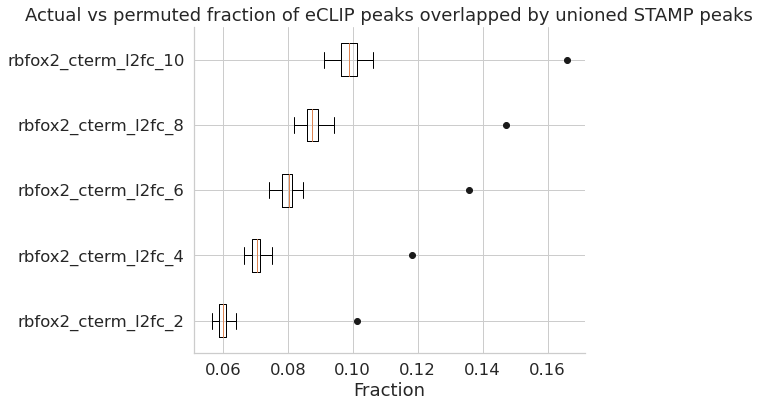

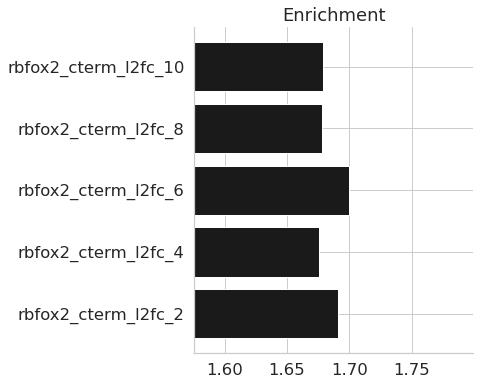

In [103]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

    
labels = ordered_labels
values = [values_list.get(l) for l in ordered_labels]
title = 'Unioned'

#print(label, '\n\t', category)
filename = title.replace('-', '_').replace(' ', '_').replace(',', '')
filename = '{}/{}'.format(figures_directory, filename)
print(filename)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params, font_scale=1.5)

plt.figure(figsize=(7, 6))

tick_labels = labels
range_array= [i+1 for i in range(len(labels))]

a = plt.boxplot(values, vert=False, showfliers=False)


b = plt.scatter([rbfox2_eclip_intersection_values.get('unioned_cleaned_peaks').get(l) for l in tick_labels], range_array, color='k')
plt.xlabel("Fraction")
plt.title("Actual vs permuted fraction of eCLIP peaks overlapped by unioned STAMP peaks".format(title))
c = plt.yticks(range_array, tick_labels)


plt.savefig('{}-box.png'.format(filename), bbox_inches='tight')
plt.savefig('{}-box.svg'.format(filename), bbox_inches='tight')

motif_odds_ratios = {}
for label, peak_set in zip(labels, values):
    permuted_val = np.mean(peak_set)
    actual_val = rbfox2_eclip_intersection_values.get('unioned_cleaned_peaks').get(label)

    motif_odds_ratios[label] = actual_val/permuted_val

ordered_motif_ors = []
for o in tick_labels:
    ordered_motif_ors.append(motif_odds_ratios.get(o))

plt.figure(figsize=(5, 6))
plt.barh(tick_labels, ordered_motif_ors, color='k')

min_val = np.min(ordered_motif_ors)
max_val = np.max(ordered_motif_ors)

plt.xlim(min_val - 0.1, max_val + 0.1)
plt.title("Enrichment")

print(motif_odds_ratios)
plt.savefig('{}-enrich.png'.format(filename), bbox_inches='tight')
plt.savefig('{}-enrich.svg'.format(filename), bbox_inches='tight')
